In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("data.xls")
furniture = df.loc[df['Category'] == 'Furniture']

In [3]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [4]:
#This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [5]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [6]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [7]:
y = furniture['Sales'].resample('D').mean()

In [8]:
y['2017':]

Order Date
2017-01-01     975.4900
2017-01-02     913.4300
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
                ...    
2017-12-26          NaN
2017-12-27          NaN
2017-12-28     551.2568
2017-12-29    2330.7180
2017-12-30     323.1360
Freq: D, Name: Sales, Length: 364, dtype: float64

In [19]:
y.to_csv("raw.csv")

In [22]:
y

Order Date
2014-01-06    2573.8200
2014-01-07      76.7280
2014-01-08          NaN
2014-01-09          NaN
2014-01-10      51.9400
                ...    
2017-12-26          NaN
2017-12-27          NaN
2017-12-28     551.2568
2017-12-29    2330.7180
2017-12-30     323.1360
Freq: D, Name: Sales, Length: 1455, dtype: float64

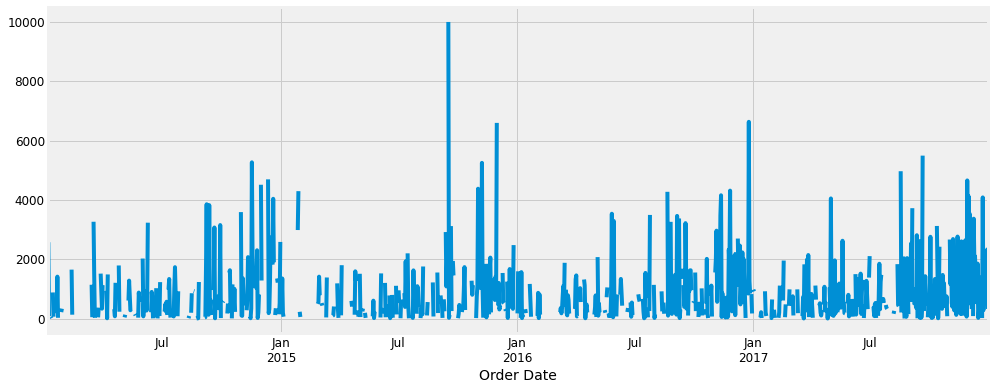

In [9]:
y.plot(figsize=(15, 6))
plt.show()

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
#The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 297.78. Therefore we should consider this to be optimal option.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:15272.301848728936
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:15088.847129378775
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:15321.911398605233
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:14688.48037358656
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:15005.336795294766
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:14770.66508971119
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:15024.075762484048
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:14684.763030586008
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:15179.06134754032
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:15015.023606073679
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:15306.762724650776
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:14674.319980662574
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:14975.998496240383
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:14839.280565284811
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:15025.816803228612
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:14670.742126770498
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:15527.057618958379
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:15425.23540693

c:\Users\prave\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:14676.928591465909
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:14730.982011767632
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:14715.991683679462
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:15060.451097767389


c:\Users\prave\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:14701.573715777578
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:15231.68982852312
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:15133.909878758544
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:15735.099581262832
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:15095.781292147065
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:15133.86327692387
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:15144.626506171373
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:15441.090272994259
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:15097.12448090724
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:14950.596261839975
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:14683.134321254514
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:15570.4181640444
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:14668.12614486329
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:14700.11201027771
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:14685.1105090624
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:15345.945116517412
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:14668.249056991535


In [12]:
#Fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0081      0.122     -0.066      0.947      -0.248       0.231
ma.L1         -0.9990      0.035    -28.439      0.000      -1.068      -0.930
ar.S.L12      -0.5307      0.060     -8.782      0.000      -0.649      -0.412
sigma2      3.562e+06   1.97e+05     18.096      0.000    3.18e+06    3.95e+06


In [13]:
from statsmodels.tsa.arima_model import ARIMAResults
results.save("arima_time_series_forecasting.pkl")

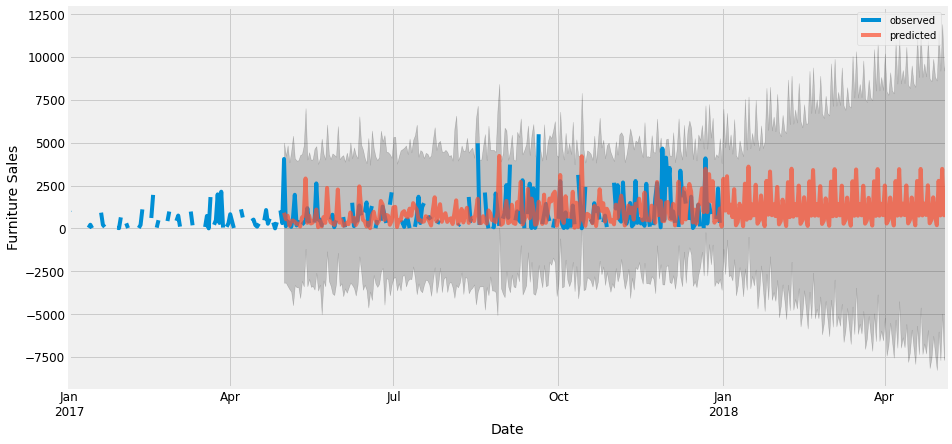

In [14]:
pred = results.get_prediction(start=pd.to_datetime('2017-05-01'),end= pd.to_datetime('2018-05-05'),dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='predicted', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [15]:
pred.predicted_mean

2017-05-01     915.823116
2017-05-02     537.331813
2017-05-03     741.412466
2017-05-04     154.558813
2017-05-05     407.624254
                 ...     
2018-05-01    2774.272038
2018-05-02     756.826948
2018-05-03    3475.572494
2018-05-04     764.531543
2018-05-05    1458.079548
Freq: D, Name: predicted_mean, Length: 370, dtype: float64

In [16]:
#The Root Mean Squared Error of our forecasts is 151.64

#In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

#Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1581764.84


In [17]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1257.68


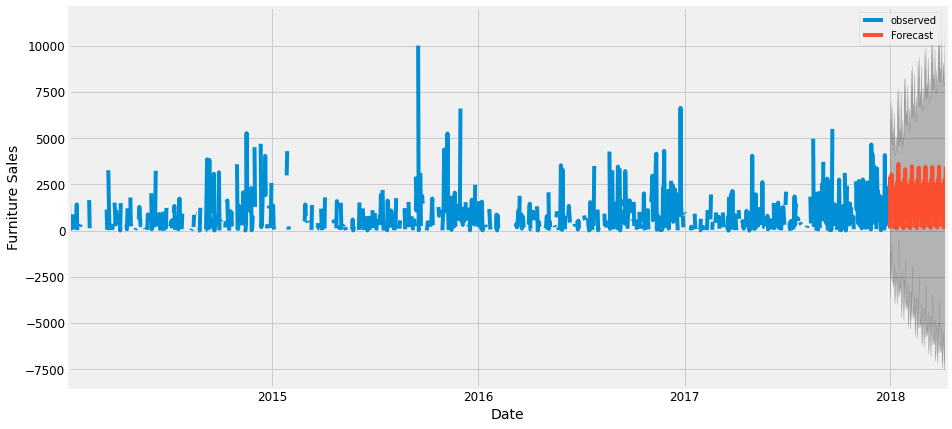

In [18]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()